In [31]:
# Import essential libraries
import numpy as np
import matplotlib.pyplot as plt

# Set simulation parameters
Vthresh = -66   #mV
Vreset  = -75   #mV
Vspike  =  20   #mV
Rm      =  10   #MOhms lower Resistance = lower spikes
tau     =  10   #ms
dt      =  0.05 #ms
counter =  0

In [32]:
# Creates a vector of time points from 0 to 499 ms in steps of dt=0.05
timeVector = np.arange(0, 500, dt)

# Creates a placeholder for our voltages that is the same size as timeVector
voltageVector = np.zeros(len(timeVector))

# Creates a placeholder for the external stimulation vector.
# It is also the same size as the time vector.
stimVector = np.zeros(len(timeVector))

In [33]:
# Set the initial voltage to be equal to the resting potential
voltageVector[0] = Vreset

In [34]:
#as determined by the problem (given)

# Sets the external stimulation to 0.5 nA for the first 100 ms
stimVector[0:2000] = 0.5

# Sets the external stimulation to 1.3 nA between 125 and 250 ms
stimVector[2500:4000]= 1.3

# Sets the external stimulation to 2.0 nA between 250 and 350 ms
stimVector[5000:7000] = 2.0

In [35]:
# This line initiates the loop. "S" counts the number of loops.
# We are looping for 1 less than the length of the time vector
# because we have already calculated the voltage for the first
# iteration.
for S in range(len(timeVector)-1):
  # Vinf is set to equal the resting potential plus the product
  # of the stimulation vector at the Sth time point.
  Vinf= Vreset + Rm * stimVector[S]
  
  # The next voltage value is is equal to where we are going (Vinf)
  # plus the product of the different between the present voltage and
  # Vinf (how far we have to go) and e^-t/tau (how far we are going
  # in each step)
  voltageVector[S+1] = Vinf + (voltageVector[S]-Vinf)*np.exp(-dt/tau)
  
  # This 'if' condition states that if the next voltage is greater than
  # or equal to the threshold, then to run the next section
  if voltageVector[S+1] >= Vthresh:
     # This states that the next voltage vector will be the Vspike value
     voltageVector[S+1] = Vspike
     
     # This 'if' statement checks if we are already at Vspike (this is
     # another way we can be above Vthresh)
     if voltageVector[S] == Vspike:
      
        # Set the next voltage equal to the reset value
        voltageVector[S+1] = Vreset
        
        # This will count the number of observed spikes so that spike count
        # rate may be calculated later
        counter += 1

Text(0.5, 1.0, 'Voltage versus time')

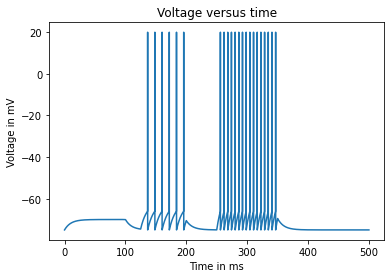

In [36]:
# This sets the new plot object
plt.figure()

# This plots the voltage (y-axis) as a function of time (x-axis)
plt.plot(timeVector, voltageVector)

# This labels the y-axis
plt.ylabel('Voltage in mV')

# This labels the x-axis
plt.xlabel('Time in ms')

# This sets the title
plt.title('Voltage versus time')

In [37]:
# Begin by setting the default stimulation level to 0
stimVector = np.zeros(len(timeVector))

# At 0.5 ms, 0.5 nA of current is injected
stimVector[timeVector==0.5] = 5

# From 50 to 54 ms, 5 nA are injected into the cell
tStart = np.where(timeVector==50)[0]
tEnd = np.where(timeVector==54)[0]
stimVector[tStart[0]:tEnd[0]] = 5

# At 150 ms, 15 nA is injected for one time step
stimVector[timeVector==150] = 15

# From 200-202 ms, the current is held at 15 nA
tStart = np.where(timeVector==200)[0]
tEnd = np.where(timeVector==202)[0]
stimVector[tStart[0]:tEnd[0]] = 15

# A pulse of 30 nA at 250 ms
stimVector[timeVector==250] = 30

# From 300 to 301 ms, the applied current is 30 nA
tStart = np.where(timeVector==300)[0]
tEnd = np.where(timeVector==301)[0]
stimVector[tStart[0]:tEnd[0]] = 30

Text(0, 0.5, 'Membrane potential in mV')

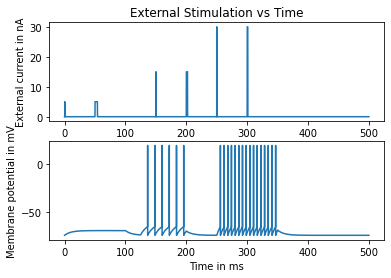

In [38]:
# This sets the plot object
plt.figure()

# This defines that we are plotting into the top plot
plt.subplot(2,1,1) # two rows, one column, first graph

# Plots time on the x-axis and current on the y-axis
plt.plot(timeVector, stimVector)

# Labels the x-axis
plt.xlabel('Time in ms')

# Labels the y-axis
plt.ylabel('External current in nA')

# Titles the plot
plt.title('External Stimulation vs Time')

# This defines that we are plotting into the top plot
plt.subplot(2,1,2) # 2 rows, 1 column, 2nd graph

# Plots time on the x-axis and voltage on the y-axis
plt.plot(timeVector, voltageVector)

# Labels the x-axis
plt.xlabel('Time in ms')

# Labels the y-axis
plt.ylabel('Membrane potential in mV')